### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [173]:
# import libraries
library(ggplot2)
library(tidyr)

In [181]:
# load csv files
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [175]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [176]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [177]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1

**Do males or females use bikeshare more?**

In [186]:
# combine dataframes with gender columns
df2 = rbind(ny, chi)

In [187]:
# total count of genders
gender_total = table(df2$Gender)
# test
gender_total


       Female   Male 
  7158  13882  42360 

In [190]:
 #drop na values
cities <- df2 %>% drop_na()

In [191]:
# total count of genders
gender_total = table(df2$Gender)
# test
gender_total


       Female   Male 
  7158  13882  42360 

In [90]:
# percentage of genders
percent_gender = (gender_total / length(cities$Gender) * 100)
print(percent_gender)    


               Female       Male 
 0.3437583 24.5964384 75.0598033 


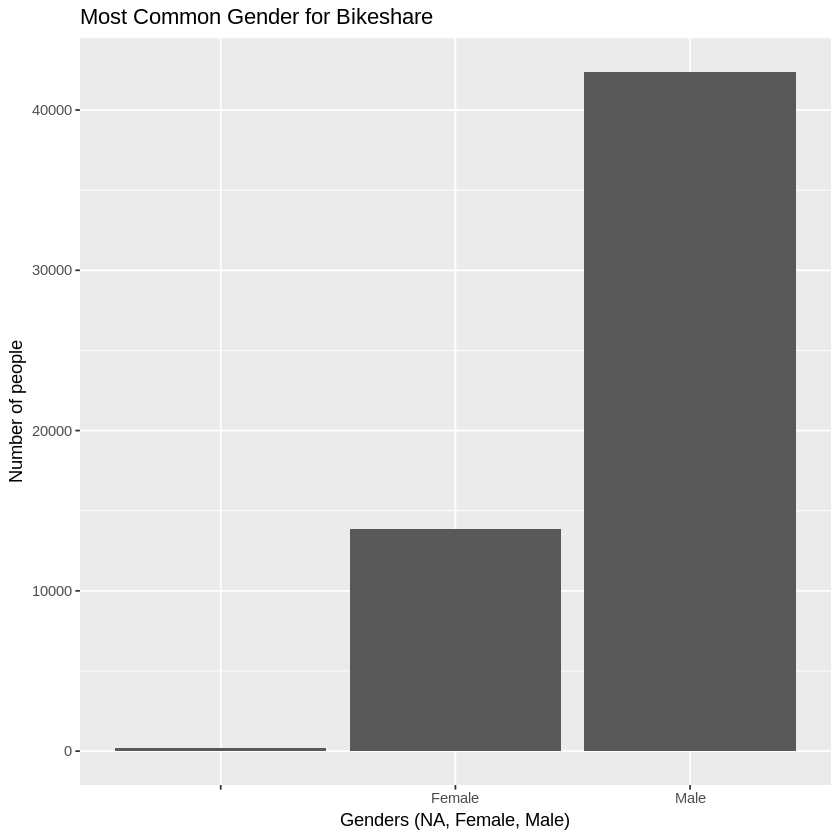

In [91]:
# plot amount of people vs their genders
qplot(x=Gender, data=cities,
     main='Most Common Gender for Bikeshare',
     ylab='Number of people',
     xlab='Genders (NA, Female, Male)')


In [92]:
# get statistics for subscriber, by gender
by(cities$User.Type, cities$Gender, summary)

cities$Gender: 
             Customer Subscriber 
         2         10        182 
------------------------------------------------------------ 
cities$Gender: Female
             Customer Subscriber 
        31        324      13526 
------------------------------------------------------------ 
cities$Gender: Male
             Customer Subscriber 
        85        491      41784 

**Question 1 summary.**
<br><br>
Between New York and Chicago, it looks like bike sharing is much more popular with men than women. The data shows that there are 13881 women, and 42360 men using the service, meaning there are more than double the amount of males. 
<br><br>
I then checked the statistics to see if there was a big difference between the amount of men and women who were customers or subscribers. From the summary, it looks like being a subcriber is more popular for both men and women. However, being a subscriber is much more popular for men overall, since the number of male and female customers only vary by 167 people and there are many more males than females.  

### Question 2

**What are the most popular days of the week?**

In [93]:
# get weekdays from Start.Time data
wash$weekday <- weekdays(as.Date(wash$Start.Time))
chi$weekday <- weekdays(as.Date(chi$Start.Time))
ny$weekday <- weekdays(as.Date(ny$Start.Time))

In [155]:
# print out values for rides per day, for each city 
print('new york: trips per day')
table(ny$weekday)

print('chicago: trips per day')
table(chi$weekday)

print('washington: trips per day')
table(wash$weekday)


[1] "new york: trips per day"



   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
     8168      7570      6176      6597      8729      7898      9632 

[1] "chicago: trips per day"



   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
     1285      1302      1150      1111      1254      1292      1236 

[1] "washington: trips per day"



   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    12926     11721     12133     11566     13204     13288     14212 

Based on these tables, it looks like the weekdays are more popular for the bikeshare service than the weekends are, for all of the cities. However, this will be more clear once the values are plotted.

In [163]:
# Create sorted tables for trips by week
ny_trips <- table(ny$weekday)

chi_trips <- table(chi$weekday)

wash_trips <- table(wash$weekday)

In [164]:
# get mean of trips, per city
mean(ny_trips)
mean(chi_trips)
mean(wash_trips)

[1] 7824.286

[1] 1232.857

[1] 12721.43

In [165]:
# get median of trips, per city
median(ny_trips)
median(chi_trips)
median(wash_trips)

[1] 7898

[1] 1254

[1] 12926

In [166]:
# get standard deviation of trips, per city
sd(ny_trips)
sd(chi_trips)
sd(wash_trips)

[1] 1190.073

[1] 74.35148

[1] 957.3968

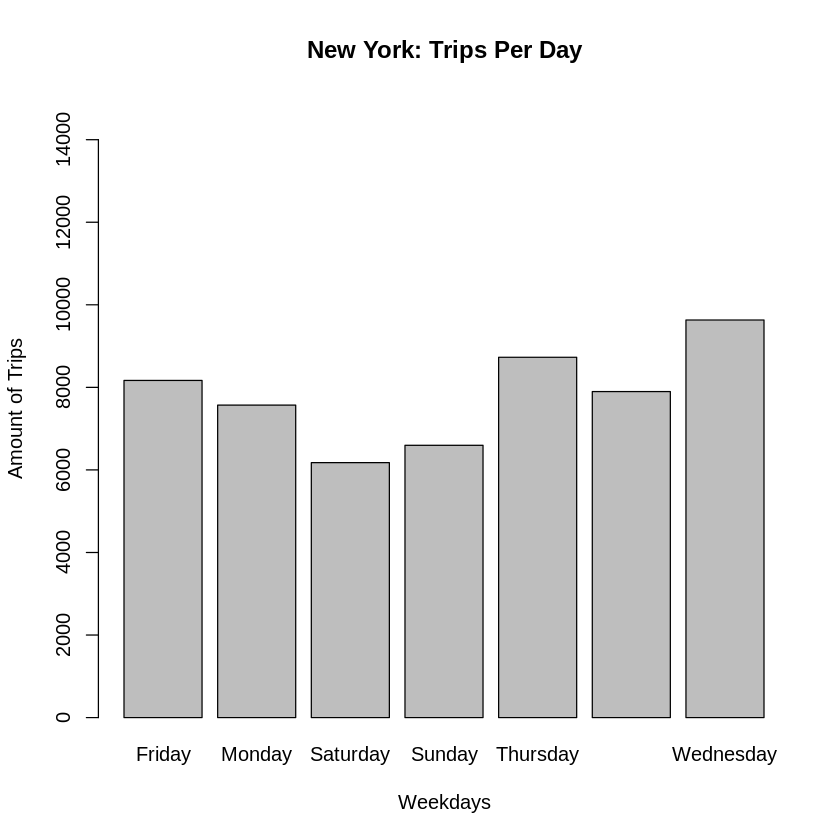

In [167]:
# plot of rides for ny, per day
barplot(ny_trips, xlab='Weekdays', ylab='Amount of Trips', ylim=c(0,15000), main='New York: Trips Per Day')

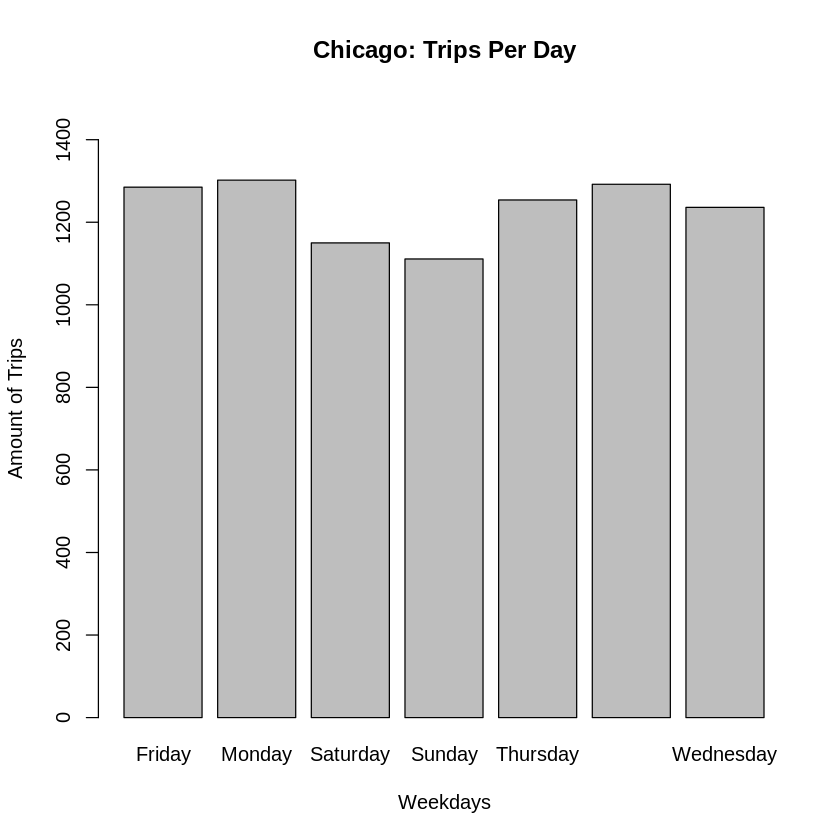

In [168]:
# plot of rides for chicago, per day
barplot(chi_trips, xlab='Weekdays', ylab='Amount of Trips', ylim=c(0,1500), main='Chicago: Trips Per Day')

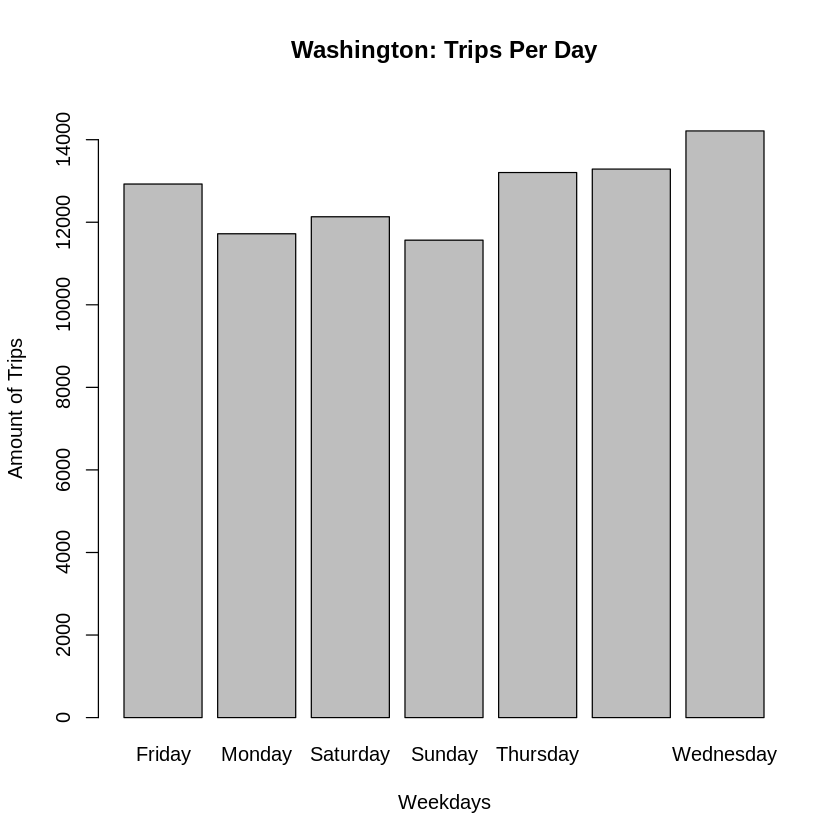

In [169]:
# plot of rides for washington, per day
barplot(wash_trips, xlab='Weekdays', ylab='Amount of Trips', ylim=c(0,15000), main='Washington: Trips Per Day')

**Question 2 summary**
<br>
From these graphs we can see that the number of trips, as well as most popular days, varies across cities. In New York and Washington, the most popular day is Wednesday. However, the most popular day for Chicago is Monday. Saturdays and Sundays seemed to have a lower popularity in all of the cities, which was suprising since I would have guessed that the weekends would be the most popular for a bikeshare service. So the service may be used more for commuting than casual rides. However, the amount of rides varies greatly among the cities, with Washington having the highest amount, and New York having the least, according the mean, median, and graphs. New York has the highest standard deviation for trips though, which is interesting.

### Question 3



**What is the most popular month for travel?**

In [146]:
# month function, to extract month from Start.Time
months = function(df){
    return(substring(df$Start.Time,6,7))
}


In [147]:
# get counts of months, by city name
city_counts = function(var, name, city){
    counts = data.frame(table(var))
    names(counts) = c(name, city)
    return(counts)
}

In [148]:
# use cbind to bind month and counts into table
trips_month = cbind(city_counts(months(chi), 'Month', 'Chicago'), 
                      'New.York'=count_table(months(ny), 'Month', 'New.York')[,2], 
                      'Washington'=count_table(months(wash), 'Month', 'Washington')[,2])

In [149]:
# test
trips_month

Month,Chicago,New.York,Washington
01,650,5745,8946
02,930,6364,11563
03,803,5820,12612
04,1526,10661,18522
05,1905,12180,17072
06,2816,14000,20335


In [150]:
# function to make dataframe, combining a column and city name
df_month_city = function(column, col1,  city){
    new_cols = data.frame(column, city, stringsAsFactors = FALSE)
    names(new_cols) = c(col1, 'City')
    return(new_cols)
}

In [151]:
# use rbind to bind months and cities, for plotting
df_months = rbind(df_month_city(as.integer(month(ny)), 'month', 'Chicago'),
              df_month_city(as.integer(month(chi)), 'month', 'New York'), 
              df_month_city(as.integer(month(wash)), 'month', 'Washington'))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

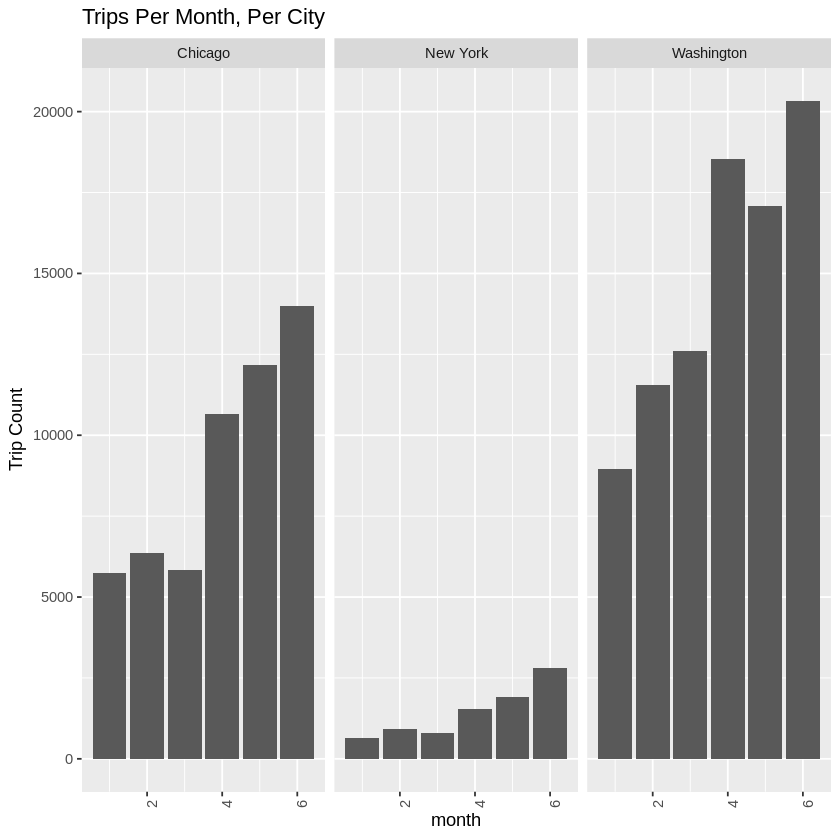

In [153]:
# plot histograms for trips vs months, for each city
ggplot(data = df_months, aes(x = month)) +
    geom_histogram(stat="count") +
    facet_wrap(~City) +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Trips Per Month, Per City') +
    ylab('Trip Count')

**Question 3 Summary** <br><br>
The most popular month to travel is June, based on the graphs and table. There is a steady increase from January to June, with winter being the least popular and Spring being the most popular. The graphs also show that Washington has the most riders, while Chicago has the least. However, this could be due to Washington having more mild winters than the other cities, making people more inclined to ride bikes. 


### References
* https://stackoverflow.com/questions/8169323/r-concatenate-two-dataframes
* https://stackoverflow.com/questions/63677684/extract-date-and-time-from-datetime-field-in-r
* https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
* https://stackoverflow.com/questions/18046051/setting-individual-axis-limits-with-facet-wrap-and-scales-free-in-ggplot2
* https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2

In [154]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')